# Visualizations of kNN scores on traffic flow data

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Plotting parameters

In [2]:
# plotting parameters
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size=15)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15, title_fontsize=15)
plt.rc('lines', linewidth=0.2, linestyle='-', markersize = 12)
plt.rc('axes', titlesize=15, labelsize = 15)

### Load traffic flow data

In [3]:
# read preprocessed data to get size of training/validation/test set
print('Loading data...')
df_train = pd.read_pickle('data/preprocessed/metric_features_preprocessed_sample_10000_0.012_train.pkl')
df_val = pd.read_pickle('data/preprocessed/metric_features_preprocessed_sample_10000_0.012_val.pkl')
df_test = pd.read_pickle('data/preprocessed/metric_features_preprocessed_sample_10000_0.012_test.pkl')

n_train = df_train.shape[0]
n_val = df_val.shape[0]
n_test = df_test.shape[0]

print('Number of flows in training set: ', n_train)
print('Number of flows in validation set: ', n_val)
print('Number of flows in test set: ', n_test)

Loading data...
Number of flows in training set:  107779
Number of flows in validation set:  59854
Number of flows in test set:  59845


## kNN scores on validation set

### Load scores for initial choice of $l_p$-metric and features

In [4]:
# read results of initial kNN evaluation
results_init = pd.read_pickle('results/kNN_validation_scores-initial.pkl')
display(results_init.shape)

results_init.sort_values(by='class_accuracy',ascending=False).head(10)

(220, 7)

,target,features,p,n_neigh,weights,class_accuracy,f1_mac
135,SM_CATEGORY,features_basic_statistical,0.10,5,distance,0.869282,0.810146
137,SM_CATEGORY,features_basic_statistical,0.10,7,distance,0.868129,0.808169
125,SM_CATEGORY,features_basic_statistical,0.08,5,distance,0.867879,0.806948
133,SM_CATEGORY,features_basic_statistical,0.10,3,distance,0.867478,0.805891
145,SM_CATEGORY,features_basic_statistical,0.12,5,distance,0.867110,0.806467
127,SM_CATEGORY,features_basic_statistical,0.08,7,distance,0.867060,0.805788
143,SM_CATEGORY,features_basic_statistical,0.12,3,distance,0.866642,0.806311
123,SM_CATEGORY,features_basic_statistical,0.08,3,distance,0.866325,0.804409
139,SM_CATEGORY,features_basic_statistical,0.10,9,distance,0.866291,0.805304
147,SM_CATEGORY,features_basic_statistical,0.12,7,distance,0.866241,0.804828


In [5]:
# extract parameters used in kNN evaluation
print('Targets used in evaluation:\n', results_init['target'].unique())

f_list = results_init['features'].unique()
print('\nSets of features considered:\n', f_list)

p_list = results_init['p'].unique()
print('\nValues of p considered in distance:\n', p_list)

k_list = results_init['n_neigh'].unique()
print('\nValues of k neighbors considered in kNN:\n', k_list)

print('\nWeights used in kNN:\n', results_init['weights'].unique())

Targets used in evaluation:
 ['SM_CATEGORY']

Sets of features considered:
 ['features_basic' 'features_basic_statistical']

Values of p considered in distance:
 [0.06 0.08 0.1  0.12 0.14 0.16 0.2  0.3  0.5  0.7  1.  ]

Values of k neighbors considered in kNN:
 [1 3 5 7 9]

Weights used in kNN:
 ['uniform' 'distance']


### kNN classification accuracy for initial choice of $l_p$-metric and features

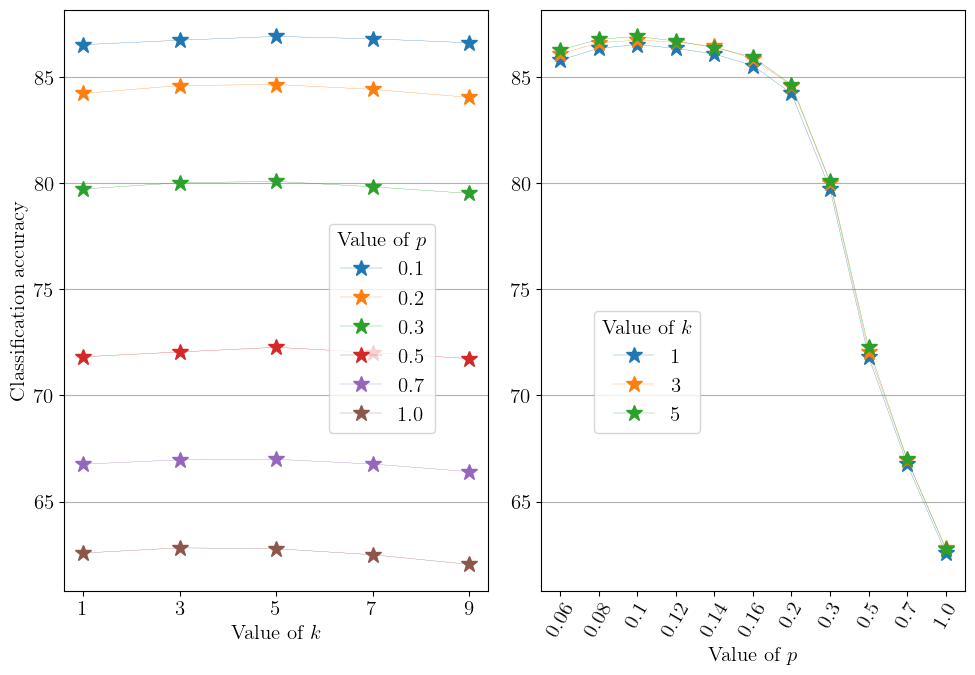

In [6]:
# choose subset of values for p
#p_list_to_plot = p_list
p_list_to_plot = [0.1 , 0.2 , 0.3 , 0.5 , 0.7 , 1.]
#k_list_to_plot = k_list
k_list_to_plot = [1, 3, 5]


plt.figure(figsize = (10,7))

# plot dependence on k
ax1 = plt.subplot(121)

for p in p_list_to_plot:
    data = results_init[(results_init['p'] == p) & (results_init['features'] == 'features_basic_statistical') & (results_init['weights'] == 'distance')]
    ax1.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = str(p))

ax1.grid(axis = 'y')
plt.xticks(range(data.shape[0]), list(k_list)*int(data.shape[0]/len(k_list)))
plt.ylabel('Classification accuracy')
plt.xlabel('Value of $k$')
plt.legend(bbox_to_anchor=(0.6, 0.65), loc='upper left', title='Value of $p$')

# plot dependence on p
ax2 = plt.subplot(122, sharey=ax1)

for k in k_list_to_plot:
    data = results_init[(results_init['n_neigh'] == k) & (results_init['features'] == 'features_basic_statistical') & (results_init['weights'] == 'distance')]
    ax2.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = str(k))

ax2.grid(axis = 'y')
plt.xticks(range(data.shape[0]), list(p_list)*int(data.shape[0]/len(p_list)), rotation=60)
plt.xlabel('Value of $p$')
plt.legend(bbox_to_anchor=(0.1, 0.5), loc='upper left', title='Value of $k$')

plt.tight_layout()

save_as = 'graph_knn_initial_k_p.pdf'
plt.savefig('pictures/' + save_as, bbox_inches='tight')
plt.show()

### Load scores with probability distance features and feature reduction

In [7]:
# read results of kNN evaluation
results_BSCMR = pd.read_pickle('results/kNN_validation_scores_BSCM_reduced.pkl')
display(results_BSCMR.shape)

results_BSCMR.sort_values(by='class_accuracy',ascending=False).head(10)

(330, 7)

,target,features,p,n_neigh,weights,class_accuracy,f1_mac
23,SM_CATEGORY,features_reduced,0.10,3,distance,0.913974,0.864450
25,SM_CATEGORY,features_reduced,0.10,5,distance,0.913623,0.865635
13,SM_CATEGORY,features_reduced,0.08,3,distance,0.913389,0.863200
20,SM_CATEGORY,features_reduced,0.10,1,uniform,0.913373,0.864472
21,SM_CATEGORY,features_reduced,0.10,1,distance,0.913373,0.864472
15,SM_CATEGORY,features_reduced,0.08,5,distance,0.912988,0.863427
10,SM_CATEGORY,features_reduced,0.08,1,uniform,0.912554,0.863451
11,SM_CATEGORY,features_reduced,0.08,1,distance,0.912554,0.863451
30,SM_CATEGORY,features_reduced,0.12,1,uniform,0.911969,0.861314
31,SM_CATEGORY,features_reduced,0.12,1,distance,0.911969,0.861314


In [8]:
# extract parameters used in kNN evaluation
print('Targets used in evaluation:\n', results_BSCMR['target'].unique())

f_list = results_BSCMR['features'].unique()
print('\nSets of features considered:\n', f_list)

p_list = results_BSCMR['p'].unique()
print('\nValues of p considered in distance:\n', p_list)

k_list = results_BSCMR['n_neigh'].unique()
print('\nValues of k neighbors considered in kNN:\n', k_list)

print('\nWeights used in kNN:\n', results_BSCMR['weights'].unique())

Targets used in evaluation:
 ['SM_CATEGORY']

Sets of features considered:
 ['features_reduced' 'features_basic_statistical_CM_all'
 'features_basic_statistical_CM_best']

Values of p considered in distance:
 [0.06 0.08 0.1  0.12 0.14 0.16 0.2  0.3  0.5  0.7  1.  ]

Values of k neighbors considered in kNN:
 [1 3 5 7 9]

Weights used in kNN:
 ['uniform' 'distance']


### kNN classification accuracy with probability distance features and feature reduction

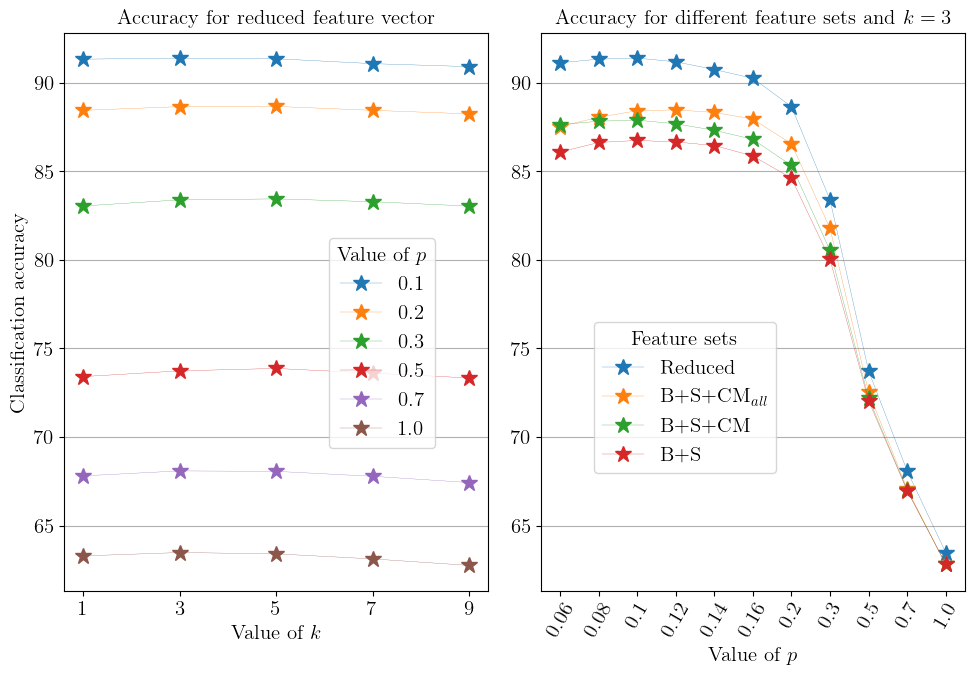

In [9]:
# choose subset of values for p
#p_list_to_plot = p_list
p_list_to_plot = [0.1 , 0.2 , 0.3 , 0.5 , 0.7 , 1.]
#k_list_to_plot = k_list
k_list_to_plot = [3]


plt.figure(figsize = (10,7))

# plot dependence on k
ax1 = plt.subplot(121)

for p in p_list_to_plot:
    data = results_BSCMR[(results_BSCMR['p'] == p) & (results_BSCMR['features'] == 'features_reduced') & (results_BSCMR['weights'] == 'distance')]
    ax1.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = str(p))

ax1.grid(axis = 'y')
plt.xticks(range(data.shape[0]), list(k_list)*int(data.shape[0]/len(k_list)))
plt.title('Accuracy for reduced feature vector')
plt.ylabel('Classification accuracy')
plt.xlabel('Value of $k$')
plt.legend(bbox_to_anchor=(0.6, 0.65), loc='upper left', title='Value of $p$')

# plot dependence on p
ax2 = plt.subplot(122, sharey=ax1)

for k in k_list_to_plot:
    data = results_BSCMR[(results_BSCMR['n_neigh'] == k) & (results_BSCMR['features'] == 'features_reduced') & (results_BSCMR['weights'] == 'distance')]
    ax2.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = 'Reduced')
    data = results_BSCMR[(results_BSCMR['n_neigh'] == k) & (results_BSCMR['features'] == 'features_basic_statistical_CM_all') & (results_BSCMR['weights'] == 'distance')]
    ax2.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = 'B+S+CM$_{all}$')
    data = results_BSCMR[(results_BSCMR['n_neigh'] == k) & (results_BSCMR['features'] == 'features_basic_statistical_CM_best') & (results_BSCMR['weights'] == 'distance')]
    ax2.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = 'B+S+CM')
    data = results_init[(results_init['n_neigh'] == k) & (results_init['features'] == 'features_basic_statistical') & (results_init['weights'] == 'distance')]
    ax2.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = 'B+S')
    #data = results_init[(results_init['n_neigh'] == k) & (results_init['features'] == 'features_basic') & (results_init['weights'] == 'distance')]
    #ax2.plot(range(data.shape[0]), 100*data['class_accuracy'],'-*', label = 'B')

ax2.grid(axis = 'y')
plt.xticks(range(data.shape[0]), list(p_list)*int(data.shape[0]/len(p_list)), rotation=60)
plt.title('Accuracy for different feature sets and $k=3$')
plt.xlabel('Value of $p$')
plt.legend(bbox_to_anchor=(0.1, 0.5), loc='upper left', title='Feature sets')

plt.tight_layout()

save_as = 'graph_knn_validation_k_p.pdf'
plt.savefig('pictures/' + save_as, bbox_inches='tight')
plt.show()

## kNN scores on test set

### Load scores

In [10]:
# read results of kNN evaluation
results_test = pd.read_pickle('results/kNN_test_scores.pkl')
display(results_test.shape)

(12, 7)

In [11]:
# extract parameters used in kNN evaluation
print('Targets used in evaluation:\n', results_test['target'].unique())

f_list = results_test['features'].unique()
print('\nSets of features considered:\n', f_list)

p_list = results_test['p'].unique()
print('\nValues of p considered in distance:\n', p_list)

k_list = results_test['n_neigh'].unique()
print('\nValues of k neighbors considered in kNN:\n', k_list)

print('\nWeights used in kNN:\n', results_test['weights'].unique())

Targets used in evaluation:
 ['DOMAINS_COLLECTED' 'SM_CATEGORY' 'SERVICE CATEGORY']

Sets of features considered:
 ['features_basic_statistical' 'features_basic_statistical_CM_best'
 'features_basic_statistical_CM_all' 'features_reduced']

Values of p considered in distance:
 [0.1]

Values of k neighbors considered in kNN:
 [3]

Weights used in kNN:
 ['distance']


In [12]:
results_test.drop(columns=['p','n_neigh','weights']).round(3)

,target,features,class_accuracy,f1_mac
0,DOMAINS_COLLECTED,features_basic_statistical,0.839,0.735
1,DOMAINS_COLLECTED,features_basic_statistical_CM_best,0.852,0.753
2,DOMAINS_COLLECTED,features_basic_statistical_CM_all,0.857,0.759
3,DOMAINS_COLLECTED,features_reduced,0.889,0.803
4,SM_CATEGORY,features_basic_statistical,0.863,0.809
5,SM_CATEGORY,features_basic_statistical_CM_best,0.876,0.825
6,SM_CATEGORY,features_basic_statistical_CM_all,0.880,0.832
7,SM_CATEGORY,features_reduced,0.910,0.868
8,SERVICE CATEGORY,features_basic_statistical,0.874,0.856
9,SERVICE CATEGORY,features_basic_statistical_CM_best,0.886,0.870


## kNN scores and prediction times on test set with clustering of the training set

### Load scores

In [14]:
# read results of kNN evaluation
results_test_clust = pd.read_pickle('results/kNN_with_ap_clustering_test_scores.pkl')
display(results_test_clust.shape)

(7, 21)

In [15]:
# extract parameters used in kNN evaluation
print('Targets used in evaluation:\n', results_test_clust['target'].unique())

f_list = results_test_clust['features'].unique()
print('\nSets of features considered:\n', f_list)

p_list = results_test_clust['p'].unique()
print('\nValues of p considered in distance:\n', p_list)

k_list = results_test_clust['n_neigh'].unique()
print('\nValues of k neighbors considered in kNN:\n', k_list)

print('\nWeights used in kNN:\n', results_test_clust['weights'].unique())

print('\nDamping used in Affinity propagation:\n', results_test_clust['damping'].unique())

pq_list = results_test_clust['pref_q'].unique()
print('\nPreference quantiles used in Affinity Propagation:\n', pq_list)

sample_reps = results_test_clust['sample_reps'].unique()[0]
print('\nNumber of sample sets drawn from training set:\n', sample_reps)

# calculate training set ratio
results_test_clust['n_clust_ratio'] = results_test_clust['n_clust']/n_train

# calculate ratio of prediction time with respect to AP cluster centers
results_test_clust['time_p_c_ratio'] = results_test_clust['time_p_c']/results_test_clust['time_p']

# split validation scores on random samples
for i in range(sample_reps):
    results_test_clust['class_accuracy_s_' + str(i)] = results_test_clust['class_accuracy_s'].apply(lambda x: x[i])
    
# calculate ratio of prediction time with respect to random samples
for i in range(sample_reps):
    results_test_clust['time_p_s_' + str(i)] = results_test_clust['time_p_s'].apply(lambda x: x[i])    
for i in range(sample_reps):
    results_test_clust['time_p_s_ratio_' + str(i)] = results_test_clust['time_p_s_' + str(i)]/results_test_clust['time_p']

Targets used in evaluation:
 ['SM_CATEGORY']

Sets of features considered:
 ['features_reduced']

Values of p considered in distance:
 [0.1]

Values of k neighbors considered in kNN:
 [3]

Weights used in kNN:
 ['distance']

Damping used in Affinity propagation:
 [0.8]

Preference quantiles used in Affinity Propagation:
 [0.01 0.05 0.25 0.5  0.75 0.95 0.99]

Number of sample sets drawn from training set:
 5


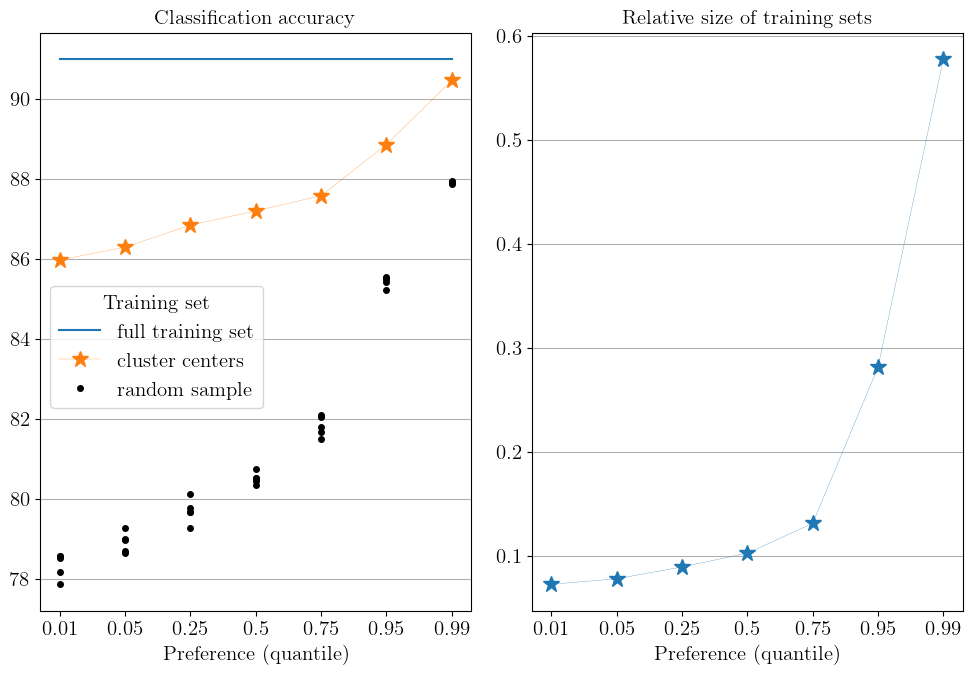

In [16]:
plt.figure(figsize = (10,7))

# plot kNN classification accuracy with respect to different training sets
ax1 = plt.subplot(121)

data = results_test_clust[(results_test_clust['p'] == 0.1) & (results_test_clust['n_neigh'] == 3) & (results_test_clust['features'] == 'features_reduced')]

plt.plot(range(data.shape[0]), 100*data['class_accuracy'],'-', linewidth=1.5, label = 'full training set')
plt.plot(range(data.shape[0]), 100*data['class_accuracy_c'],'-*', label = 'cluster centers')

for i in range(sample_reps-1):
    plt.plot(range(data.shape[0]), 100*data['class_accuracy_s_' + str(i)],'.k', markersize = 8)
    
plt.plot(range(data.shape[0]), 100*data['class_accuracy_s_' + str(sample_reps-1)],'.k', markersize = 8, label = 'random sample')
    
ax1.grid(axis = 'y')
plt.xticks(range(data.shape[0]), data.pref_q)
plt.title('Classification accuracy')
plt.xlabel('Preference (quantile)')
plt.legend(bbox_to_anchor=(0, 0.58), loc='upper left', title='Training set')

# proportion of training set used for training
ax2 = plt.subplot(122)

plt.plot(range(data.shape[0]), data['n_clust_ratio'],'-*')
#plt.plot(range(data.shape[0]), data['time_p_c_ratio'],'-*')

#for i in range(sample_reps):
#    plt.plot(range(data.shape[0]), data['time_p_s_ratio_' + str(i)],'.k', markersize = 8)

ax2.grid(axis = 'y')
plt.xticks(range(data.shape[0]), data.pref_q)
plt.title('Relative size of training sets')
plt.xlabel('Preference (quantile)')

plt.tight_layout()

save_as = 'clustering.pdf'
plt.savefig('pictures/' + save_as, bbox_inches='tight')
plt.show()